>Welcome to the Investigate a Dataset project! 
In it we perform some basic analytic operation on data of movies and conclude some relation between it's parameters 

# Project:TMBD Movie Data 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>This data set contains information about 10,000 movies collected from The Movie Database (TMDb),Here we have some interesting data to some operation include maintaining and cleaning to finially have some valuable data , and this depend on the questios we ask like :
- 1- Which genres are most popular from year to year?
- 2- What kinds of properties are associated with movies that have high revenues?


In [1]:
import numpy as pd 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
% matplotlib inline

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, I will load in the data, check for cleanliness, and then trim and clean MY dataset for analysis.

### General Properties
> Dataset chosen for analysis: TMDB movies
This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue.I'll ask questions related to genres and popularity.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies (1).csv')
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape 

(10866, 21)

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning (drop unneeded columns, fix structure)
TMDb Movie Data is the choosen dataset
The database contains information about movies collected from The Movies Database, including revenue, budget.

### The Data Structure
Before working with the data I checked the database and found missing values, inconsistency or inadequate datatype. After getting more information and find out the questions I wanted to pose, I cleaned the database. There were unecessary columns with missing data, inadequate datatypes. The columns 'genres' and 'production_companies' contained multiple values that doesn't meet the requirements of the normal form.

### The Cleaning Process
I removed the columns cast, homepage, tagline, keywords, overview and imdb id to improve database redability.
The column 'genres' and 'productions_companies' were not in the first normal form which requires that in the table should not have multiple value in the same row of data. I was unable to create a second joined column, so I decided to remove the values after the first '|' sign to get better grouping and cleaner visualization in the further analysis.
- I casted release_date from string to date datatype.
- I converted the columns revenue, budget from float to int.
- I dropped the Null value raws

In [7]:
#we can drop some columns for readability
df=df.drop(['cast', 'homepage', 'tagline', 'keywords', 'overview', 'imdb_id'], axis=1)

In [8]:
df = df.dropna()
df.head(3)

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9807 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9807 non-null   int64  
 1   popularity            9807 non-null   float64
 2   budget                9807 non-null   int64  
 3   revenue               9807 non-null   int64  
 4   original_title        9807 non-null   object 
 5   director              9807 non-null   object 
 6   runtime               9807 non-null   int64  
 7   genres                9807 non-null   object 
 8   production_companies  9807 non-null   object 
 9   release_date          9807 non-null   object 
 10  vote_count            9807 non-null   int64  
 11  vote_average          9807 non-null   float64
 12  release_year          9807 non-null   int64  
 13  budget_adj            9807 non-null   float64
 14  revenue_adj           9807 non-null   float64
dtypes: float64(4), int64

Now I'm visualizing the data to get a better inderstanding of it's distributions

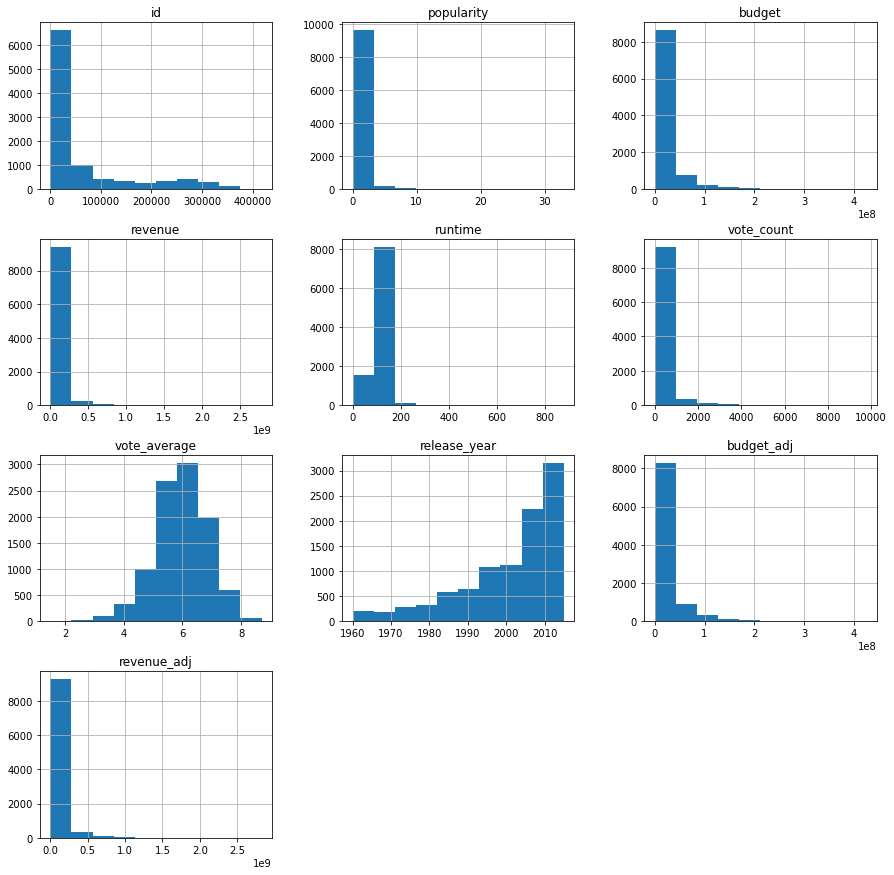

In [10]:
df.hist(figsize=(15,15));

In [11]:
#dropping the null values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9807 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9807 non-null   int64  
 1   popularity            9807 non-null   float64
 2   budget                9807 non-null   int64  
 3   revenue               9807 non-null   int64  
 4   original_title        9807 non-null   object 
 5   director              9807 non-null   object 
 6   runtime               9807 non-null   int64  
 7   genres                9807 non-null   object 
 8   production_companies  9807 non-null   object 
 9   release_date          9807 non-null   object 
 10  vote_count            9807 non-null   int64  
 11  vote_average          9807 non-null   float64
 12  release_year          9807 non-null   int64  
 13  budget_adj            9807 non-null   float64
 14  revenue_adj           9807 non-null   float64
dtypes: float64(4), int64

In [12]:
# Convert release_date (object datatype) to date.

df['release_date'] = pd.to_datetime(df['release_date'])

In [13]:
#replace 0 values with means in columns budget and revenue.
df['budget'] = df['budget'].replace(0,df['budget'].mean())

df['revenue'] = df['revenue'].replace(0,df['revenue'].mean())

I deleted the undesirable data from the rows with multiple values.

In [14]:
df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])
df['production_companies'] = df['production_companies'].apply(lambda x: x.split('|')[0])

In [15]:
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action,Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,Action,Village Roadshow Pictures,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119,Adventure,Summit Entertainment,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,Action,Lucasfilm,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137,Action,Universal Pictures,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

> Now we trimmed and cleaned the data, moving on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section. looking for relationships between variables.


<a id='eda'></a>
### The answer for the first question :

In [16]:
# scripting the required fields:
genres_popularity = df.groupby(['genres'])['popularity'].mean()
print (genres_popularity)


genres
Action             0.875737
Adventure          1.275178
Animation          0.871280
Comedy             0.572296
Crime              0.719409
Documentary        0.209573
Drama              0.587012
Family             0.783861
Fantasy            0.907793
Foreign            0.232168
History            0.839363
Horror             0.487790
Music              0.528743
Mystery            0.621116
Romance            0.786560
Science Fiction    1.156476
TV Movie           0.268062
Thriller           0.691054
War                0.789277
Western            0.690646
Name: popularity, dtype: float64


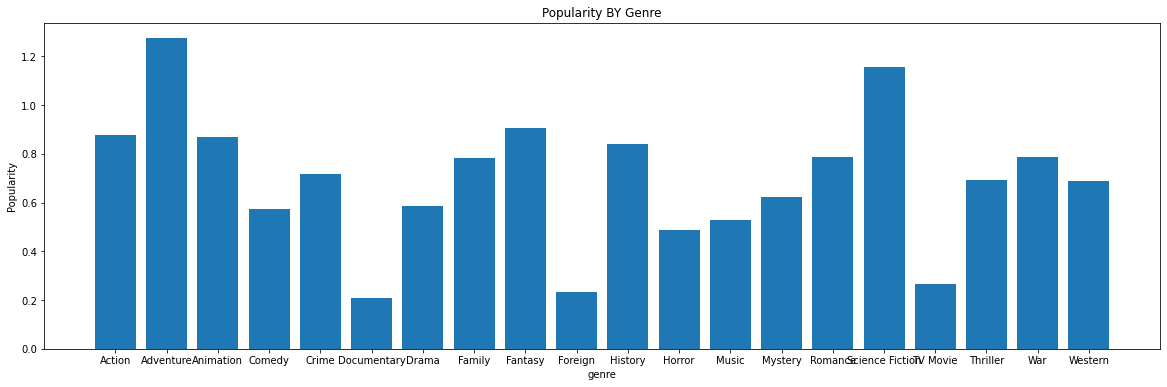

In [17]:
# visualizing the percentage of each type :
plt.subplots(figsize=(20, 6))
plt.bar(genres_popularity.index, genres_popularity)
plt.title('Popularity BY Genre')
plt.xlabel('genre')
plt.ylabel('Popularity');

> Here we show the popularity of each kind of movies and
we can see that (adventure)and( science fiction) have the high rates

### The answer for the second question :

In [18]:

# Add more headers as needed if you have more questions to investigate.
# Sort movies by revenue in descending order

sorted_revenue_biggest = df.sort_values(by=['revenue'], ascending = False).head(200)
sorted_revenue_biggest.head(1)

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,9.432768,237000000.0,2.781506e+09,Avatar,James Cameron,162,Action,Ingenious Film Partners,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09


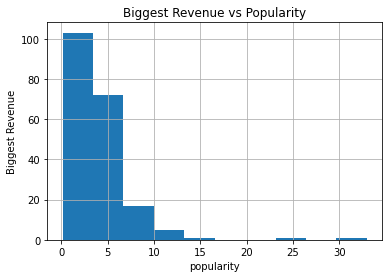

In [35]:
sorted_revenue_biggest.popularity.hist()
plt.title('Biggest Revenue vs Popularity')
plt.xlabel('popularity')
plt.ylabel('Biggest Revenue');

> the most popular movies which have the high revenue

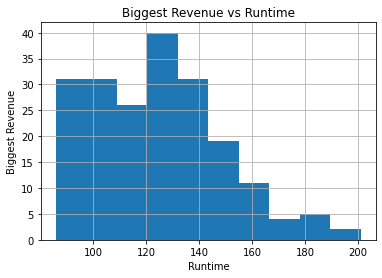

In [36]:
sorted_revenue_biggest.runtime.hist()
plt.title('Biggest Revenue vs Runtime')
plt.ylabel('Biggest Revenue')
plt.xlabel('Runtime');

> movies with medium run time have the highest revenue  

In [21]:
# feature related with short movies :
shorter_movies = df.sort_values(by=['runtime'], ascending = False).head(200)
runtime = shorter_movies['runtime']
popularity = shorter_movies['popularity']

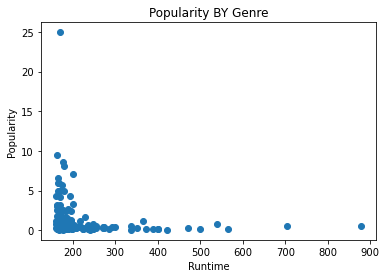

In [24]:
plt.scatter(runtime, popularity)
plt.title('Popularity BY Genre')
plt.xlabel('Runtime')
plt.ylabel('Popularity');
plt.show()


> Here we have find that short movies are more popular and have high popularity 

<a id='conclusions'></a>
## Conclusions
> Here we reach at the the end of this report which have involved :
- (1) the description of data  ;
- (2) the information about it's fields ;
- (3) visualazing them ; 
- (4) cleaning undesirable data ;
- (5) finding relation between parameters 
- In the first question I found that adventure movies is the most popular genre however I assumed it'll be Action movies, and after adventure came science fiction movies.
- In my second questions I wanted to know some characteristics of most revenuable movies so I found that the most revenuable movies is not that popular as it should, also I found that it's runtime approximately 100-130 min.

### Limitations:



- (1)The current dataset have many missing records. 
- (2)There are many records which was useless.the results will be more clear if there another related fields.   
- (3)The way we sampled the data may influence our results.Another sample may lead to different insights.
- (4)an issue during data collections, leading to corrupt/wrong data.